Table of content 
- [Introduction](#1)
- [Image Histogram](#2)
- [Histogram Equalization](#3)

<h1 style="color:salmon" id="1">Introuduction</h1>

>Image histogram : is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image.
- It plots the number of pixels for each tonal (intensity) value.
- The histogram for a **very dark image** will have most of its data points **on the left** side and center of the graph.
- The histogram for a **very bright image** with few dark areas and/or shadows will have most of its data points **on the right** side and center of the graph.
- Image histograms can be useful tools for thresholding.
- This threshold value can then be used for
  - Edge detection
  - Image segmentation
  - co-occurence metrics 

<h1 style="color:salmon" id="2">Image Histogram</h1>

- Information contained in the graph is a representation of pixel distribution as a function of tonal variation
- A histogram uses a bar graph to profile the occurrences of each gray level present in an image.
- The horizontal axis is the gray-level values.
- It begins at zero and goes to the number of gray levels (256 in this example).
- Each vertical bar represents the number of times the corresponding gray level occurred in the image.
- Histograms also help select thresholds for object detection
  - Objects in an image tend to have similar gray levels.

In [48]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

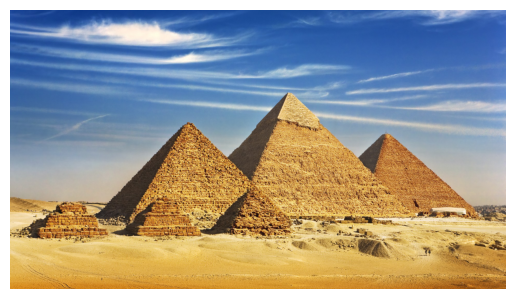

In [2]:
# reading the image
img_path = "../images/pyramid.jpg"
img = mpimg.imread(img_path)
# display
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
def RGB_to_gray(img):
    return np.dot(img[:, :, :3], [0.2989, 0.5870, 0.1140])

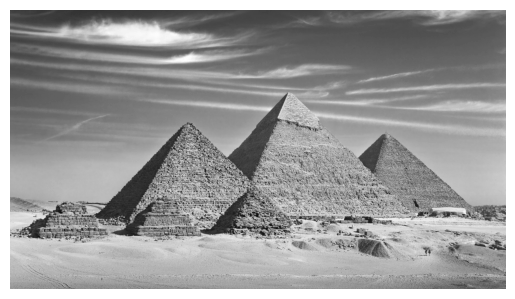

In [5]:
gimg = RGB_to_gray(img)
# display
plt.imshow(gimg, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
gimg.shape

(1080, 1920)

In [ ]:
gimg.reshape(-1, 1).shape

(2073600, 1)

In [18]:
np.zeros((255,1)).shape

(255, 1)

In [ ]:
freq_count = np.zeros((256,1), dtype=np.int16)
for ir in range(gimg.shape[0]):
    for ic in range(gimg.shape[1]):
        freq_count[int(gimg[ir, ic])] +=1 
freq_count

array([[    0],
       [    0],
       [    1],
       [    2],
       [    1],
       [    4],
       [    5],
       [    5],
       [   14],
       [   17],
       [   32],
       [   45],
       [   68],
       [   99],
       [  129],
       [  139],
       [  212],
       [  232],
       [  283],
       [  319],
       [  339],
       [  386],
       [  456],
       [  486],
       [  584],
       [  651],
       [  672],
       [  735],
       [  743],
       [  894],
       [  954],
       [ 1009],
       [ 1173],
       [ 1213],
       [ 1348],
       [ 1564],
       [ 1677],
       [ 1879],
       [ 2081],
       [ 2163],
       [ 2420],
       [ 2642],
       [ 2759],
       [ 2910],
       [ 2975],
       [ 3178],
       [ 3106],
       [ 3094],
       [ 3197],
       [ 3148],
       [ 3038],
       [ 3194],
       [ 3090],
       [ 3271],
       [ 3309],
       [ 3620],
       [ 3721],
       [ 3562],
       [ 4034],
       [ 4451],
       [ 4948],
       [ 5127],
       [

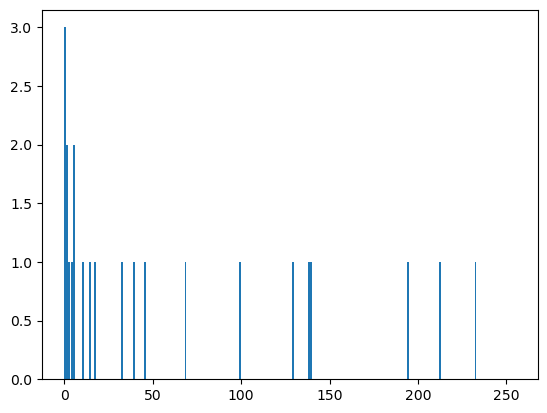

In [ ]:
# we did only rounded ints so maybe that's why the vlaues are more discrete 
plt.hist(freq_count, bins=255, range=(0,255));

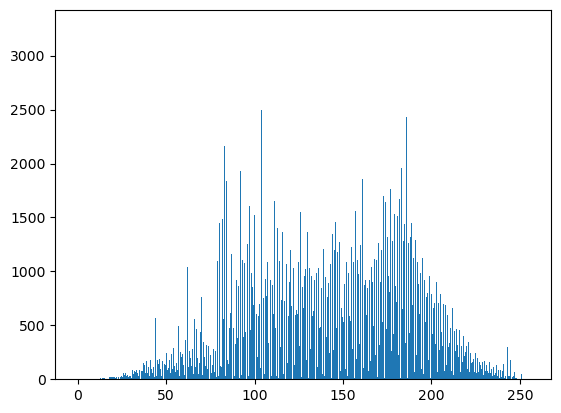

In [ ]:


plt.hist(gimg.flatten(), bins=5000, range=(0,255));

In [47]:
freq_cnt = np.zeros(256, dtype=np.int32)
for pixel in gimg.flatten():
    freq_cnt[int(pixel)] +=1 

freq_cnt

array([    0,     0,     1,     2,     1,     4,     5,     5,    14,
          17,    32,    45,    68,    99,   129,   139,   212,   232,
         283,   319,   339,   386,   456,   486,   584,   651,   672,
         735,   743,   894,   954,  1009,  1173,  1213,  1348,  1564,
        1677,  1879,  2081,  2163,  2420,  2642,  2759,  2910,  2975,
        3178,  3106,  3094,  3197,  3148,  3038,  3194,  3090,  3271,
        3309,  3620,  3721,  3562,  4034,  4451,  4948,  5127,  5074,
        5019,  5159,  4743,  4756,  4696,  5039,  5489,  6250,  6871,
        6434,  6022,  5833,  5347,  5387,  5140,  5051,  5599,  7857,
       10542, 11675, 10961, 10694, 11683, 12259, 12630, 12368, 11586,
       12323, 12408, 12338, 12375, 13496, 13855, 13538, 13312, 13058,
       12679, 12466, 13252, 13565, 12828, 11166,  9938,  9934,  9911,
       10356, 10849, 11749, 12436, 12523, 12596, 13057, 13188, 13276,
       13683, 13243, 13290, 13155, 12695, 12163, 12599, 12674, 13006,
       12926, 13105,

In [50]:
freq_cnt.shape

(256,)

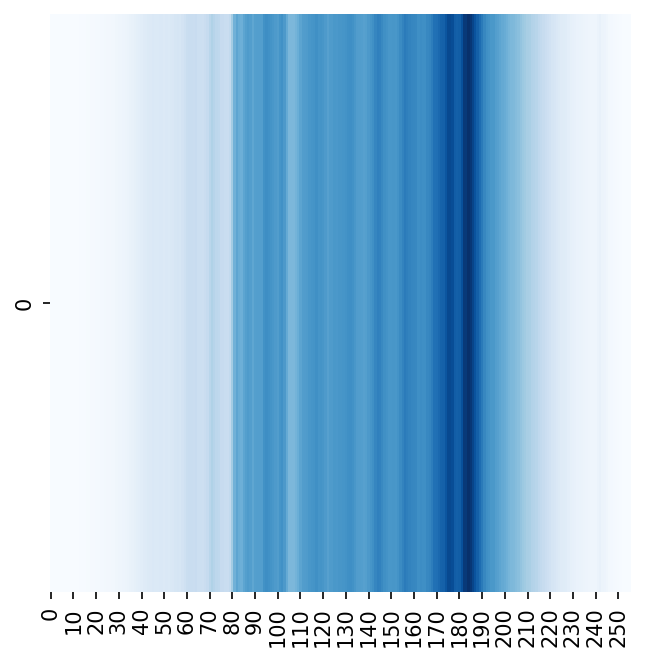

In [71]:
plt.figure(figsize=(5,5), dpi=150)
sns.heatmap(freq_cnt.reshape(1,256), cmap="Blues", cbar=False);

<h1 style="color:salmon" id="3">Histogram Equalization</h1>

- Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.
- This method usually increases the global contrast of many images, especially when the image is represented by a narrow range of intensity values.
- Through this adjustment, the intensities can be better distributed on the histogram utilizing the full range of intensities evenly. 
- This allows for areas of lower local contrast to gain a higher contrast.
- Histogram equalization accomplishes this by effectively spreading out the highly populated intensity values which are used to degrade image contrast.
- It is a Straightforward technique adaptive to the input image and an invertible operator.
  - if the histogram equalization function is known, then the original histogram can be recovered.
- The method is indiscriminate
  - It may increase the contrast of background noise
  - while decreasing the usable signal.
- Histogram equalization will work the best when applied to images with much higher color depth than palette size, like continuous data or 16-bit gray-scale images.

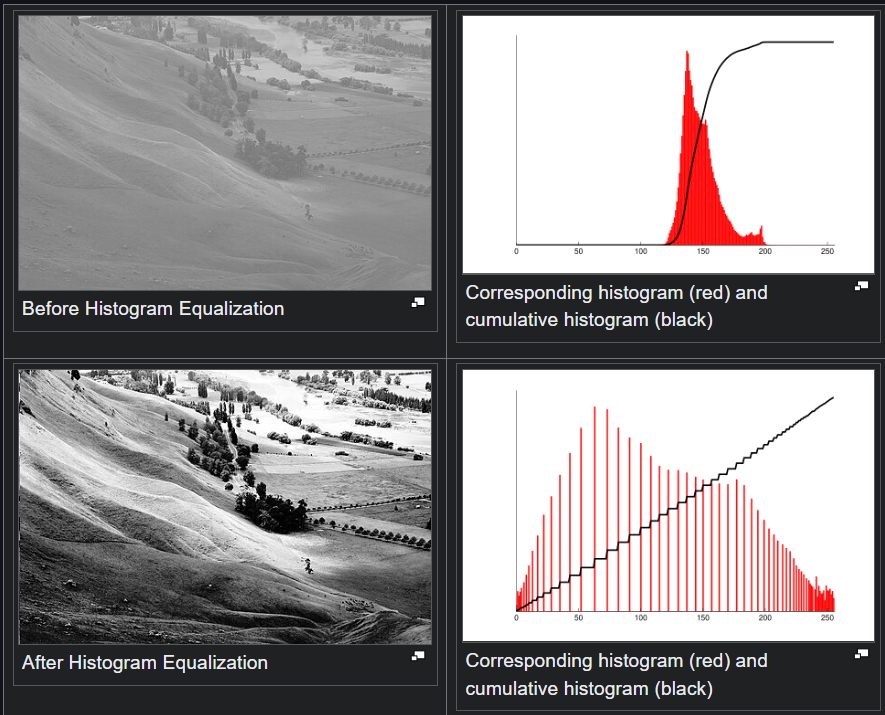

## Equalization Algorithm 
1. Calculate the histogram of the image 
   - histogram is just the frequency/count of each pixel values in the image.
   - if the image has $N×M$ pixels.
   - for each pixel we would calculate the number of occurence $n_i$ which is the histogram $H(i)$
   - the probability of each intensity value $i$ in the image is $p(i)$ 
   $$
   \huge p(i) = \frac{n_i}{Area} = \frac{H(i)}{N×M} 
   $$
2. Compute the cumulative distribution function (CDF)
   - The CDF is used to map the original intensities to the new, equalized intensities.
   - compute the cumulative sum for each intensity level $i$
   $$
   \huge C(i) = \sum_{j=0}^{i} p(j)
   $$
   - $C(i)$ gives the cumulative probability up to intensity $i$.
   - This step effectively "spreads" the intensity values over the whole range.
   - $C(i)$ ranges from 0 and 1.
3. Map Each Pixel to the New Intensity Value
   - Using the CDF, we can map each original intensity value to a new one that distributes the pixel intensities more evenly across the histogram.
   - multiply each $C(i)$ by the maximum intensity value (255 for 8-bit images)
   $$

   \huge new-intensity(i) = int(255*C(i))
   $$

image shape:  (302, 453, 4)


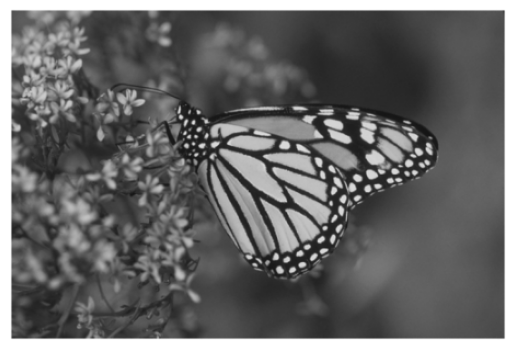

In [91]:
# let's read an image
img_1 = mpimg.imread("../images/high_contrast.png")
print("image shape: ", img_1.shape)
plt.imshow(img_1)
plt.axis('off')
plt.show()

image shape:  (302, 453)


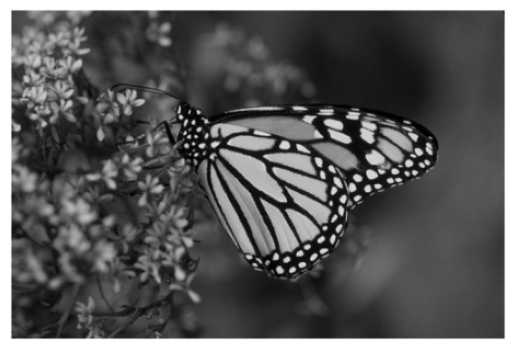

In [93]:
img_1_gray = RGB_to_gray(img_1)
print("image shape: ", img_1_gray.shape)
plt.imshow(img_1_gray, cmap='gray')
plt.axis('off')
plt.show()

In [111]:
import pandas as pd
# pd.DataFrame(img_1_gray.reshape(-1,1)).value_counts().reset_index().style.background_gradient()
# this is a normalize image ... mean that it's not from 0 to 255 but 0 to 1 scale 
pd.DataFrame(img_1_gray.reshape(-1,1)).describe()

,0
count,136806.000000
mean,0.349222
std,0.166757
min,0.082345
25%,0.231349
50%,0.317615
75%,0.392118
max,0.999900


In [112]:
i_freq_img_1 = np.zeros((256, 1), dtype=np.int16)
for pxl in img_1_gray.flatten():
    # *255 because it's normalized (Scaled)
    i_freq_img_1[int(pxl*255)] += 1
i_freq_img_1

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   9],
       [  42],
       [  69],
       [  71],
       [  85],
       [ 108],
       [  98],
       [ 107],
       [ 131],
       [ 156],
       [ 212],
       [ 265],
       [ 308],
       [ 417],
       [ 469],
       [ 586],
       [ 616],
       [ 723],
       [ 861],
       [1111],
       [1475],
       [1680],
       [1666],
       [1704],
       [1511],
       [1263],
       [1265],
       [1194],
       [1216],
       [1205],
       [1216],
       [1234],
       [1319],
       [1395],
       [1466],
       [1696],
       [1837],
       [1745],
       [1754],
       [1649],
       [1597],
       [1594],
       [1476],
       [1487],
       [1495],
       [1498],
       [14

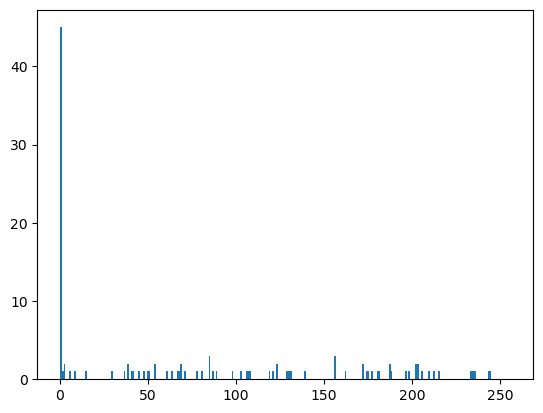

In [125]:
plt.hist(i_freq_img_1, bins=255, range=(0,256));

In [147]:
equ_img_1 = scaled_img_1.copy()
Area = equ_img_1.shape[0] * equ_img_1.shape[1]
P_i = (1/Area)*i_freq_img_1
CDF = np.cumsum(i_freq_img_1)
CDF *= 255
CDF = CDF / Area

In [150]:
CDF

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.67755800e-02, 9.50616201e-02, 2.23674400e-01, 3.56015087e-01,
       5.14451121e-01, 7.15758081e-01, 8.98425508e-01, 1.09786851e+00,
       1.34204640e+00, 1.63282312e+00, 2.02798123e+00, 2.52192886e+00,
       3.09602649e+00, 3.87329503e+00, 4.74748915e+00, 5.83976580e+00,
       6.98796105e+00, 8.33559932e+00, 9.94046314e+00, 1.20113153e+01,
       1.47606465e+01, 1.78920881e+01, 2.09974343e+01, 2.41736108e+01,
       2.69900443e+01, 2.93442174e+01, 3.17021183e+01, 3.39276786e+01,
       3.61942459e+01, 3.84403096e+01, 4.07068769e+01, 4.30069953e+01,
       4.54655498e+01, 4.80657647e+01, 5.07983202e+01, 5.39595851e+01,
      

In [155]:
for r in range(equ_img_1.shape[0]):
    for c in range(equ_img_1.shape[1]):
        pxl_value = int(equ_img_1[r, c])
        equ_img_1[r, c] = int(CDF[pxl_value])

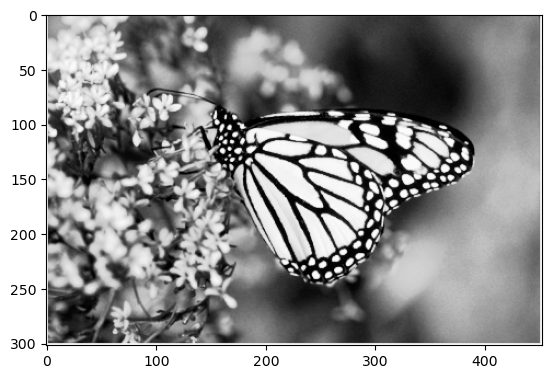

In [158]:
plt.imshow(equ_img_1, cmap="gray");

In [159]:
equ_img_1.mean()

128.14527140622488

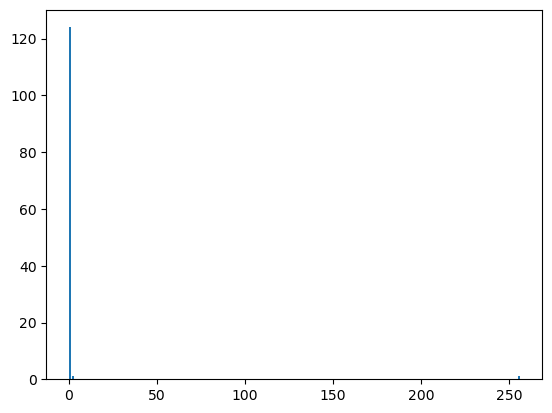

In [160]:
i_equ_img_1 = np.zeros((256, 1), dtype=np.int16)
for pxl in equ_img_1.flatten():
    # *255 because it's normalized (Scaled)
    i_equ_img_1[int(pxl)] += 1
plt.hist(i_equ_img_1, bins=255, range=(0,256));

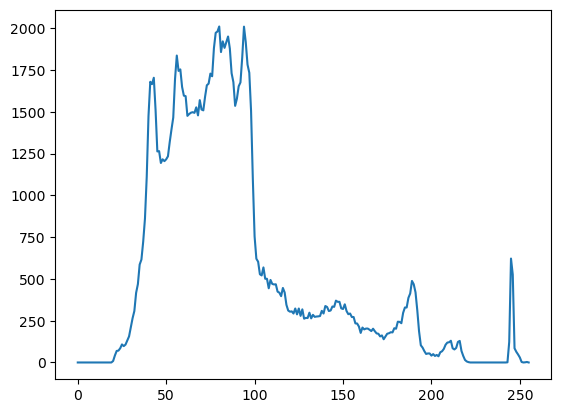

In [166]:
plt.plot(i_freq_img_1);

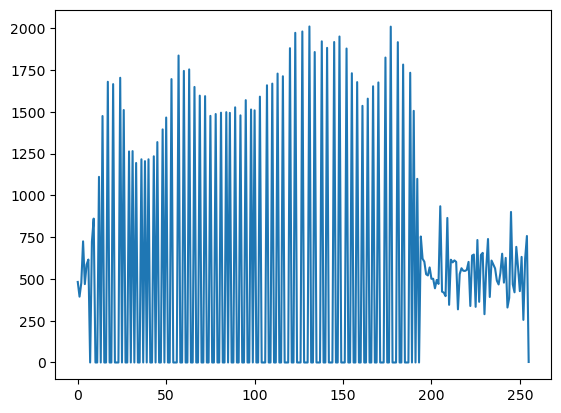

In [164]:
plt.plot(i_equ_img_1); 

In [185]:
pd.DataFrame(equ_img_1.reshape(-1,1)).describe()

,0
count,136806.000000
mean,128.145271
std,73.377548
min,0.000000
25%,63.000000
50%,131.000000
75%,192.000000
max,255.000000


In [186]:
pd.DataFrame(scaled_img_1.reshape(-1,1)).describe()

,0
count,136806.000000
mean,89.051583
std,42.522964
min,20.997901
25%,58.994100
50%,80.991903
75%,99.990002
max,254.974500


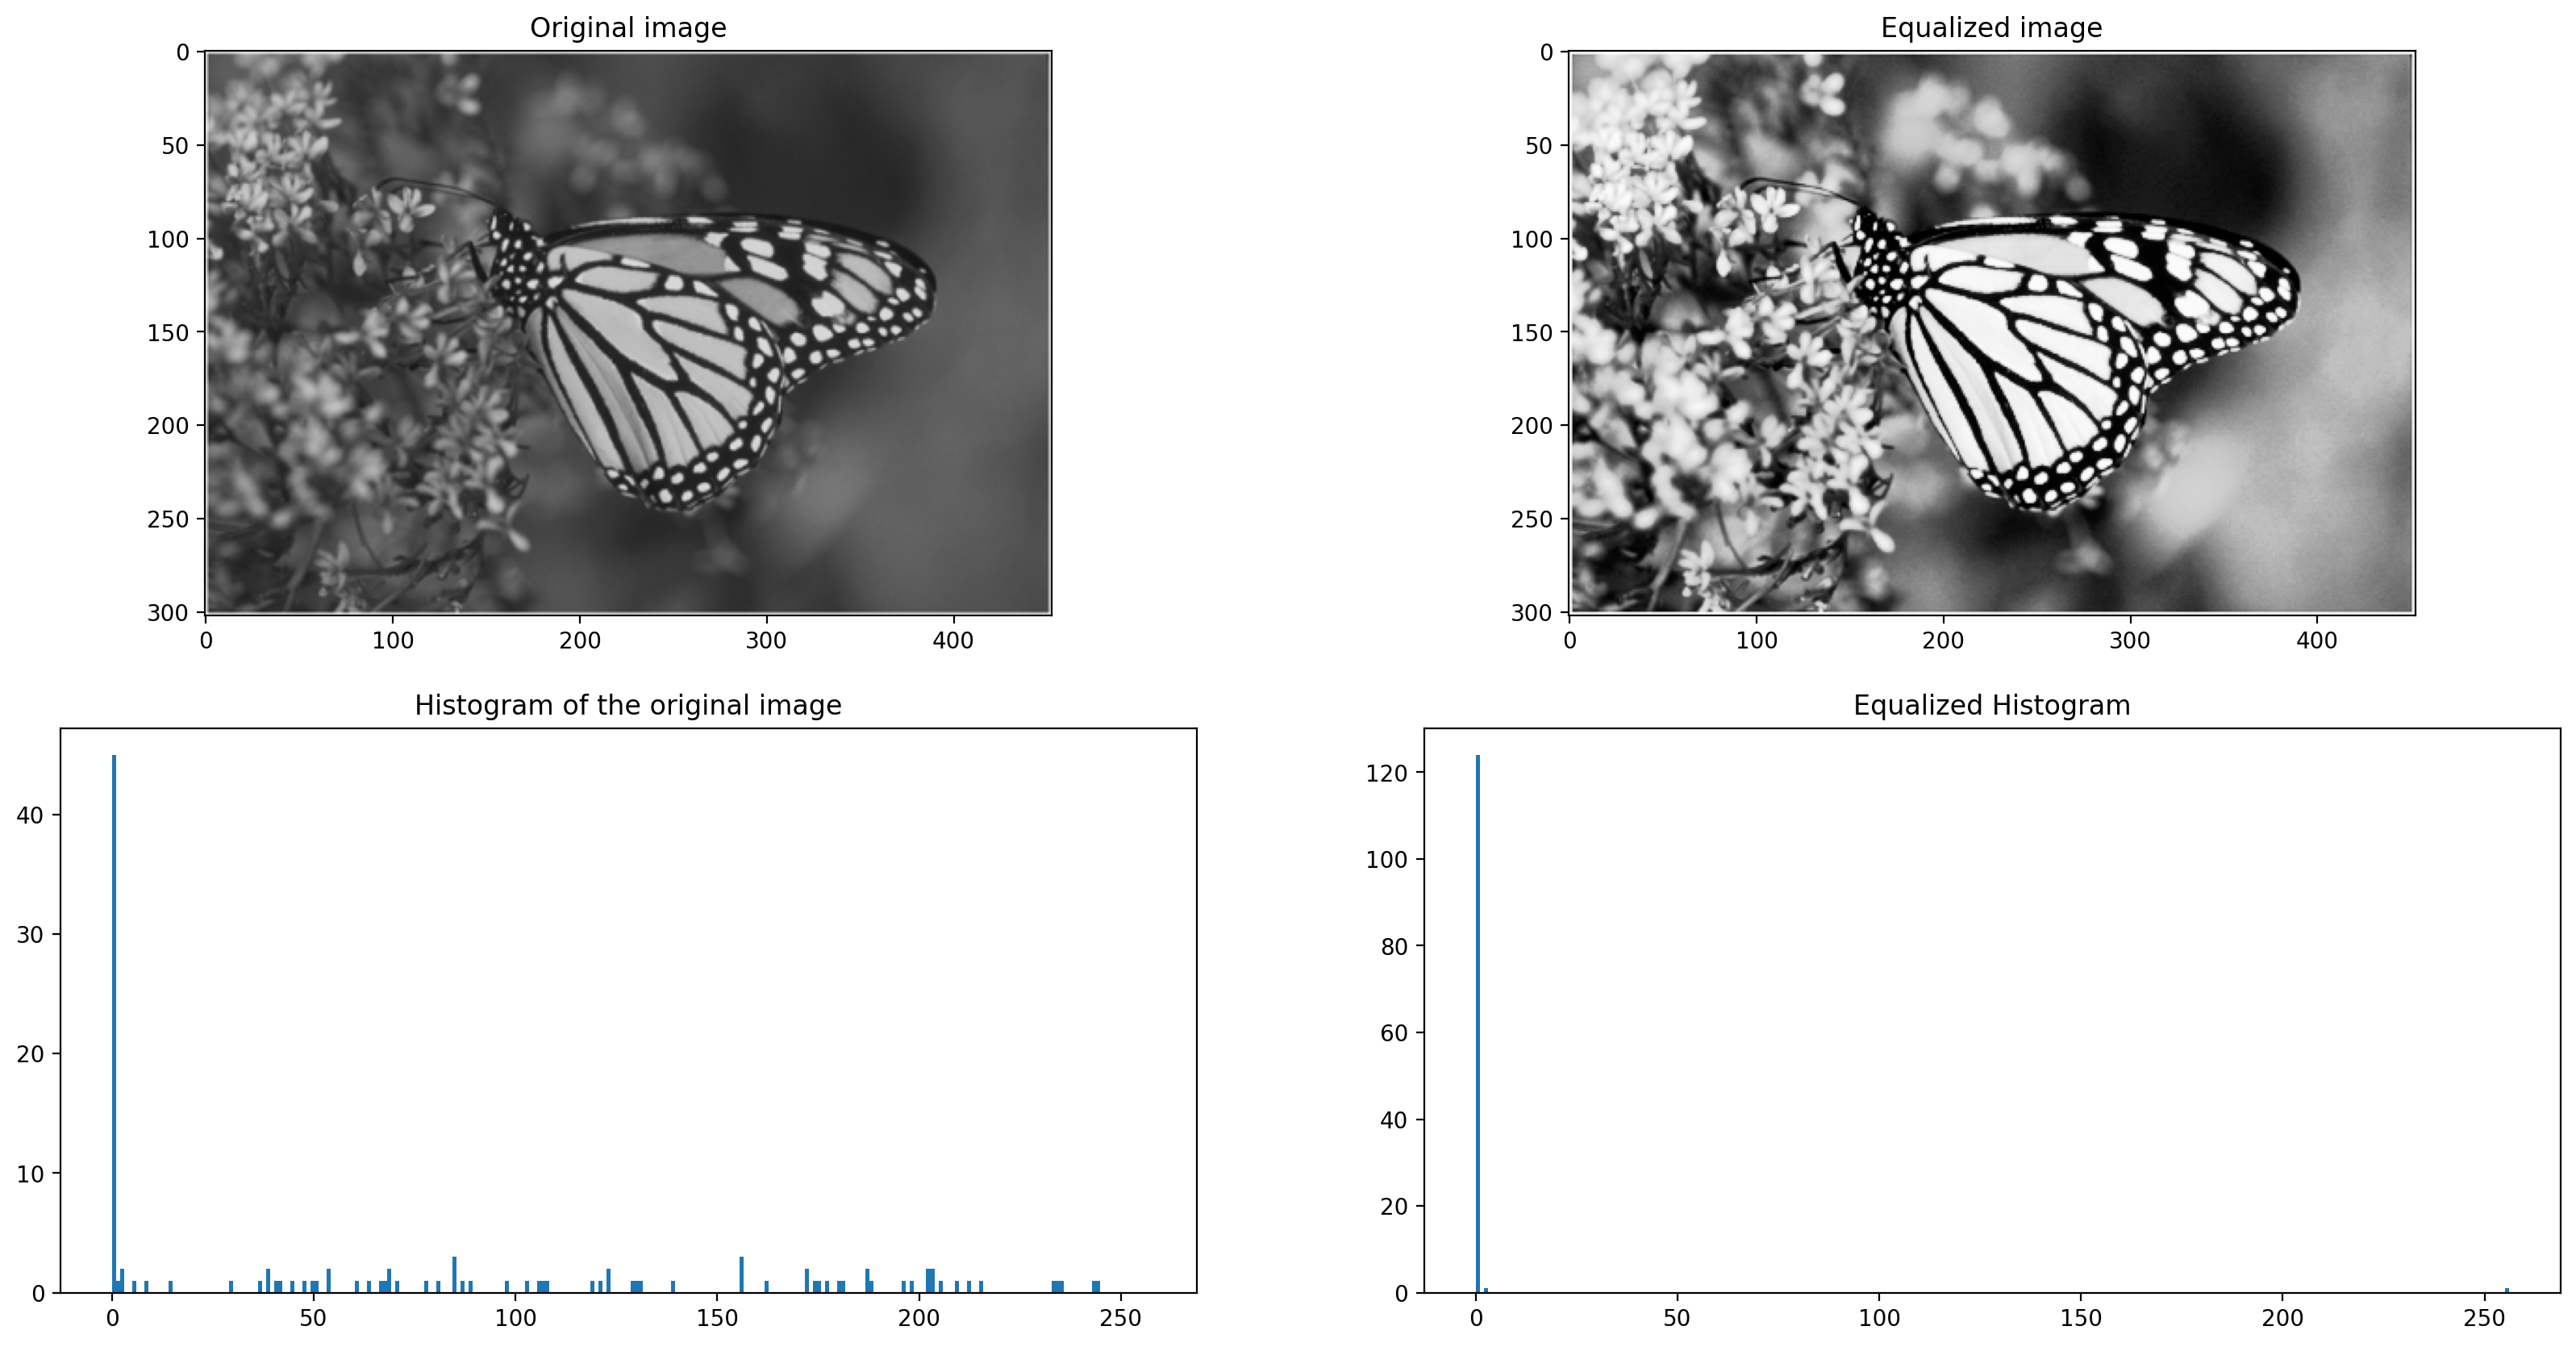

In [199]:
fig, axes = plt.subplots(2, 2, figsize=(20,10), dpi=200)

axes[0, 0].imshow(img_1)
axes[0, 0].set_title("Original image")
axes[0, 1].imshow(equ_img_1, cmap='gray')
axes[0, 1].set_title("Equalized image")
axes[1, 0].hist(i_freq_img_1,bins=255, range=(0,256))
# axes[1, 0].plot(i_freq_img_1)
axes[1, 0].set_title("Histogram of the original image")
axes[1, 1].hist(i_equ_img_1, bins=255, range=(0,256))
# axes[1, 1].plot(i_equ_img_1)
axes[1, 1].set_title("Equalized Histogram");


https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

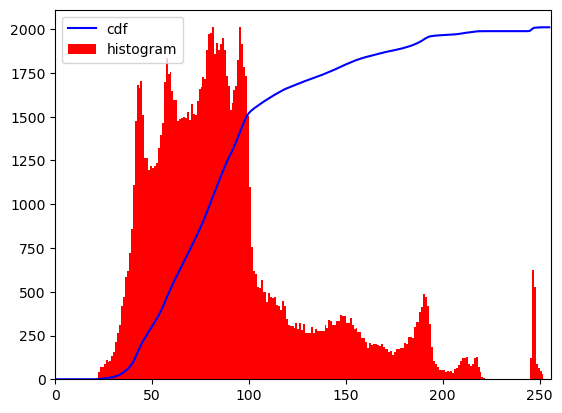

In [203]:
import cv2 as cv
img = cv.imread('../images/high_contrast.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [204]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [205]:
img2 = cdf[img]

In [206]:
img = cv.imread('../images/high_contrast.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

True